In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import cv2


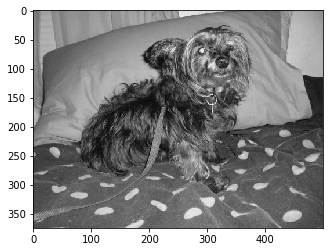

In [2]:
DATADIR = "C:\\Users\\sdosi\\ascena_work\\deep_learning\\dataset"
CATEGORY = ['Dog','Cat']

for cat in CATEGORY:
    path = os.path.join(DATADIR,cat)
    for img in os.listdir(path):
        
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break



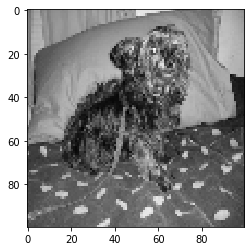

In [3]:
IMG_SIZE=100
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')

In [4]:
training_data = []

def create_training_data():
    for cat in CATEGORY:
        path = os.path.join(DATADIR,cat)
        class_num = CATEGORY.index(cat)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [5]:
print(len(training_data))

24946


In [6]:
import random

random.shuffle(training_data)

In [7]:
X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)


In [8]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [9]:
X.shape

(24946, 100, 100, 1)

### Apply Convolution 

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Activation,Flatten,Dropout,MaxPool2D
import time
from tensorflow.keras.callbacks import TensorBoard

NAME = 'DOG_CAT_CLASSIFICATION_{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir = 'logs\{}'.format(NAME))

X = X/255.0

model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X,y,batch_size=32,validation_split=0.1,epochs=3,callbacks=[tensorboard])


Train on 22451 samples, validate on 2495 samples
Epoch 1/3
22451/22451 [==============================] - 327s 15ms/sample - loss: 0.6936 - acc: 0.4992 - val_loss: 0.6932 - val_acc: 0.4910
Epoch 2/3
22451/22451 [==============================] - 341s 15ms/sample - loss: 0.6933 - acc: 0.4975 - val_loss: 0.6931 - val_acc: 0.5090
Epoch 3/3
22451/22451 [==============================] - 359s 16ms/sample - loss: 0.6932 - acc: 0.5030 - val_loss: 0.6944 - val_acc: 0.4910


In [39]:
predict_data = []
predict_path = 'C:\\Users\\sdosi\\ascena_work\\deep_learning\\dataset\\single_prediction'
def create_predict_data():
    for img in os.listdir(predict_path):
        try:
            img_array = cv2.imread(os.path.join(predict_path,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            predict_data.append(new_array)
        except Exception as e:
            pass
create_predict_data()

In [40]:
x_predict = np.array(predict_data).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [41]:
x_predict.shape

(4, 100, 100, 1)

In [44]:
x_check = x_predict[0].reshape(-1,IMG_SIZE,IMG_SIZE,1)
predict = model.predict(x_check)
#predict = np.argmax(x_check)
print('predict : ',predict)
if predict[0][0]<0.5:
    print('Dog')
else:
    print('Cat')

predict :  [[0.]]
Dog


In [31]:
predict_path = 'C:\\Users\\sdosi\\ascena_work\\deep_learning\\dataset\\single_prediction'
img='cat_or_dog_2.jpg'
test_img_array = cv2.imread(os.path.join(test_img_dir,img),cv2.IMREAD_GRAYSCALE)
test_new_img_arry = cv2.resize(test_img_array,(IMG_SIZE,IMG_SIZE))
test_new_img_arry = np.array(test_new_img_arry).reshape(-1,IMG_SIZE,IMG_SIZE,1)

x_check = X[3234].reshape(-1,IMG_SIZE,IMG_SIZE,1)
predict = model.predict(x_check)
#predict = np.argmax(x_check)
print('predict : ',predict)
if predict[0][0]<0.5:
    print('Dog')
else:
    print('Cat')

predict :  [[0.1431328]]
Dog


In [114]:
print(predict)

0


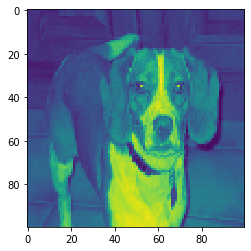

In [30]:
#test_img_array = np.array(test_img_array)
#test_img_array.dtype='float'
plt.imshow(training_data[3234][0])